##  LSH  (Locality sensitive hashing)

## Introduction

1) Basic idea - Map similar documents to similar hash code to find similarity
2) For example : document d1 becomes 10011 in 5 bit hash, document d2 (similar document) becomes 10010 in 5 bit hash (1 bit different) and document d3 (non-similar document) becomes 00001

3) This process is an efficient near O ( log N) process where N is the no of documents
4) Of course, collisions possible - Different documents can end up having same or similar hash codes, similar documents can have different hash codes,  so FPs and FNs can happen. If two documents are exactly the same, we expect them to have the same hash code
5) Step 4) is mostly circumvented by not doing only 1 hash , but L hashes for every document with different random hash tables.  So the hope is even if similar documents A and B have different hash codes with 1 hash , at least one of the L hashes will make A and B have similar hash codes

Example : Document d1 becomes  0100 with Hash H1, 1011 with H2 , 0110 with H3
          Document d2 becomes  1100 with Hash H1, 1011 with H2,  0010 with H3
          
         So even though d1 and d2 have very different hashes with H1 and H3, they are similar with H2

## How does it work ?

Assume documents are in some P dimensional space - for sparse documents

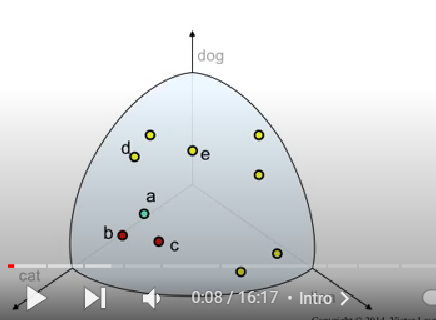

There are N documents in this space, a,b,c,d are 3 documents in this space which . We want to embed all these N documents using L K-bit hashes as discussed in the introduction section
, Such that similar documents have similar hash codes

1) This method is called the random projection method
2) Draw K hyper-random planes passing through the origin . Each of the planes divides the space into 2 halves - call these 1 and 0. Thus, let's say if K is 2 (2 planes), we get 2 bits and 4 segments -  10,11,00,01. Each point gets mapped to 1 of these 4 segments. Similarly, if you have K planes, you get 2**K combinations, and each point gets mapped to one of the 2**K combinations

For example 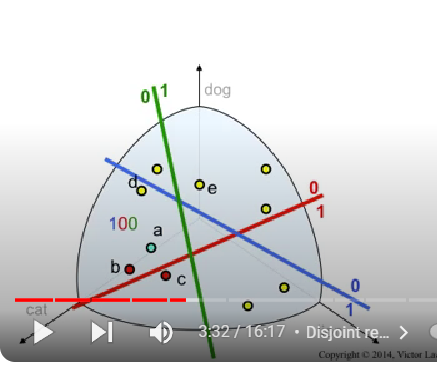
In the above figure, where K is 3 (3 random hyper-places), document a gets a hash code 100 from blue, red, green hyperplane respectively.


We get the following hash value for a,b,c,d 
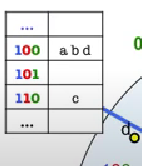

a,b,d have the same hash-code. a and b are similar in the original space, so its good they got same hash code. d is far away from a,b but still got same hash code, so FP

c is close to a,b but has a different hash code, so false negative

3) Repeat step 2 L times . So this way each point will get L different K-bit hash codes

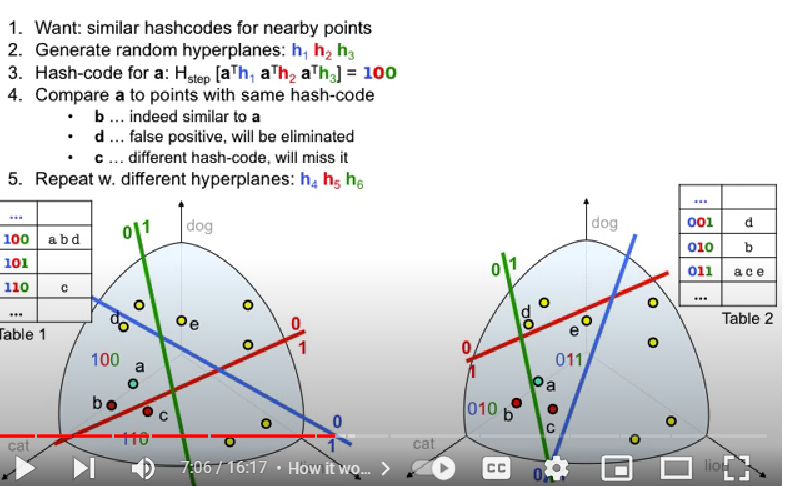

Table 1 on left and table 2 on right obtained with two different sets of 3 random hyper-planes in figure above




## Computational cost

Assume N points, each document is d-dimension, and we want to encode each point in K-bit hash codes (K random hyperplanes cutting through)

For a sparse document, d is on an average length of document. For dense embedding representation, d is the length of the embedding

1) D * K to find which bucket point lands in - Why ? K hyperplanes , We need to do a dot product between the point (say a) and each one of the K hyperplanes (the normal vectors of the hyperplane), So we do aThi , i=1..K
2) Once you go to the right bucket, you compare a with all the other points in that bucket. How many points are in each bucket on an average ?
Each bucket on average has N/2**K points (see reason above)

We compare a with all the points in the bucket, and since a is d-dimensioned, this is ND/2**K

3) Repeat 1) and 2) L times

LDK + LDN/2**K is the total complexity for a single query point

If we assume K~log(N) rougly, 

This becomes LD * log (N) + LDN/2 ** log(N) = LDlog(N) +  LD


Brute force will be O(ND) for 1 query point, so this is significantly faster



## False positives and False Negatives quantification

We can quantify FP and FN

FN (we want a and b to collide, but they don't) = P(none of the L hashcodes match for a and b)
= $$ \prod_{l=1..L}P(hash  code  l  does  not  match  for  a   and  b) $$ = P(hash  code  l  does  not  match  for  a   and  b) ** L 

## Because each of the L hashes are iid

P(hash  code  l  does  not  match  for  a   and  b) = 1 - P(all K bits match) = 1 - p**k

Therefore, FN = (1 - p**k) ** L

Similarly FP (a and b collide even if they should not) = P(at least one of the L hash codes match for a and b)

= 1 - P(none of the L hash codes match)
= 1 - P(a != b)**L
= 1 - (1 - q**K)**L


p is the probability that a,b have the same bit assuming a and b are near duplicates
q is ther probability that a,b have the same bit assuming a and b are not near duplicates

How do you find p and q ?


They have a geometric meaning


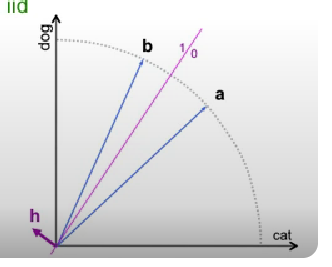

a and b have a different bit if the hyperplane lands between a and b, have the same bit if the hyperplane is not between them

Therefore , the probability that the hyperplane lands between a and b is proportional to the angle between them theta

cos_inverse(atranspose * b) gives the angle theta

P (a and b have different bit ) = cos_inverse(atranspose * b) 
P (a and b have same bit) = 1 - cos_inverse(atranspose * b)  or (2*pi - this)


## Simhash

1) A variant of LSH used for similarity search
2) Here , random projections are not used to map a document to a bit hash


### Simhash algo

1) First, tokenize, remove stop words, stem document
2) Assign weights to words (frequency or TFIDF)
3) For each word, compute a p-bit hash code (adler 32 or MP5)
4) Take each hash code for each word, take each digit separately, convert 0 to -1,weigh by weight in step 2,  add by columns across words for the whole document. If the final digit is -ve mark it 0, else mark it 1

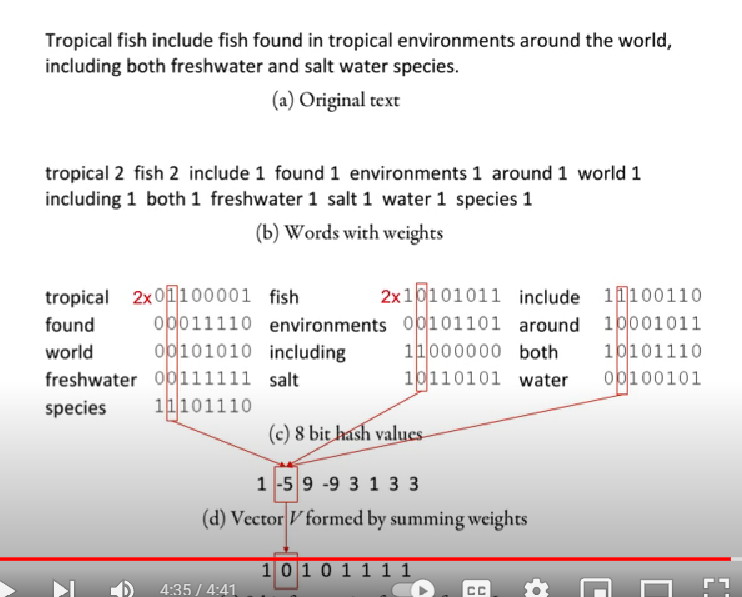



Advantage over random projection approach : faster, don't need to store hyperplanes, but slightly worse error bounds

## References

1) https://www.youtube.com/watch?v=dgH0NP8Qxa8, https://www.youtube.com/watch?v=Arni-zkqMBA, https://www.youtube.com/watch?v=h21irtHDsBw, 
2) 